In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

train_data = pd.read_csv('train-clean.csv',delimiter=',')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29210 entries, 0 to 29209
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_age                29210 non-null  float64
 1   job_type                    29210 non-null  int64  
 2   marital                     29210 non-null  int64  
 3   education                   29210 non-null  int64  
 4   default                     29210 non-null  int64  
 5   balance                     29210 non-null  float64
 6   housing_loan                29210 non-null  int64  
 7   personal_loan               29210 non-null  int64  
 8   month                       29210 non-null  int64  
 9   last_contact_duration       29210 non-null  float64
 10  num_contacts_in_campaign    29210 non-null  float64
 11  num_contacts_prev_campaign  29210 non-null  int64  
 12  prev_campaign_outcome       29210 non-null  int64  
 13  term_deposit_subscribed     292

In [3]:
input_names = list(train_data.columns)
input_names.remove('term_deposit_subscribed')

all_inputs = train_data[input_names]
all_labels = train_data['term_deposit_subscribed']

In [4]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf.fit(training_inputs, training_classes)

DecisionTreeClassifier()

In [6]:
predictions = clf.predict(testing_inputs)
predictions

array([0, 0, 1, ..., 0, 0, 0])

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(testing_classes,predictions)

0.893057647542106

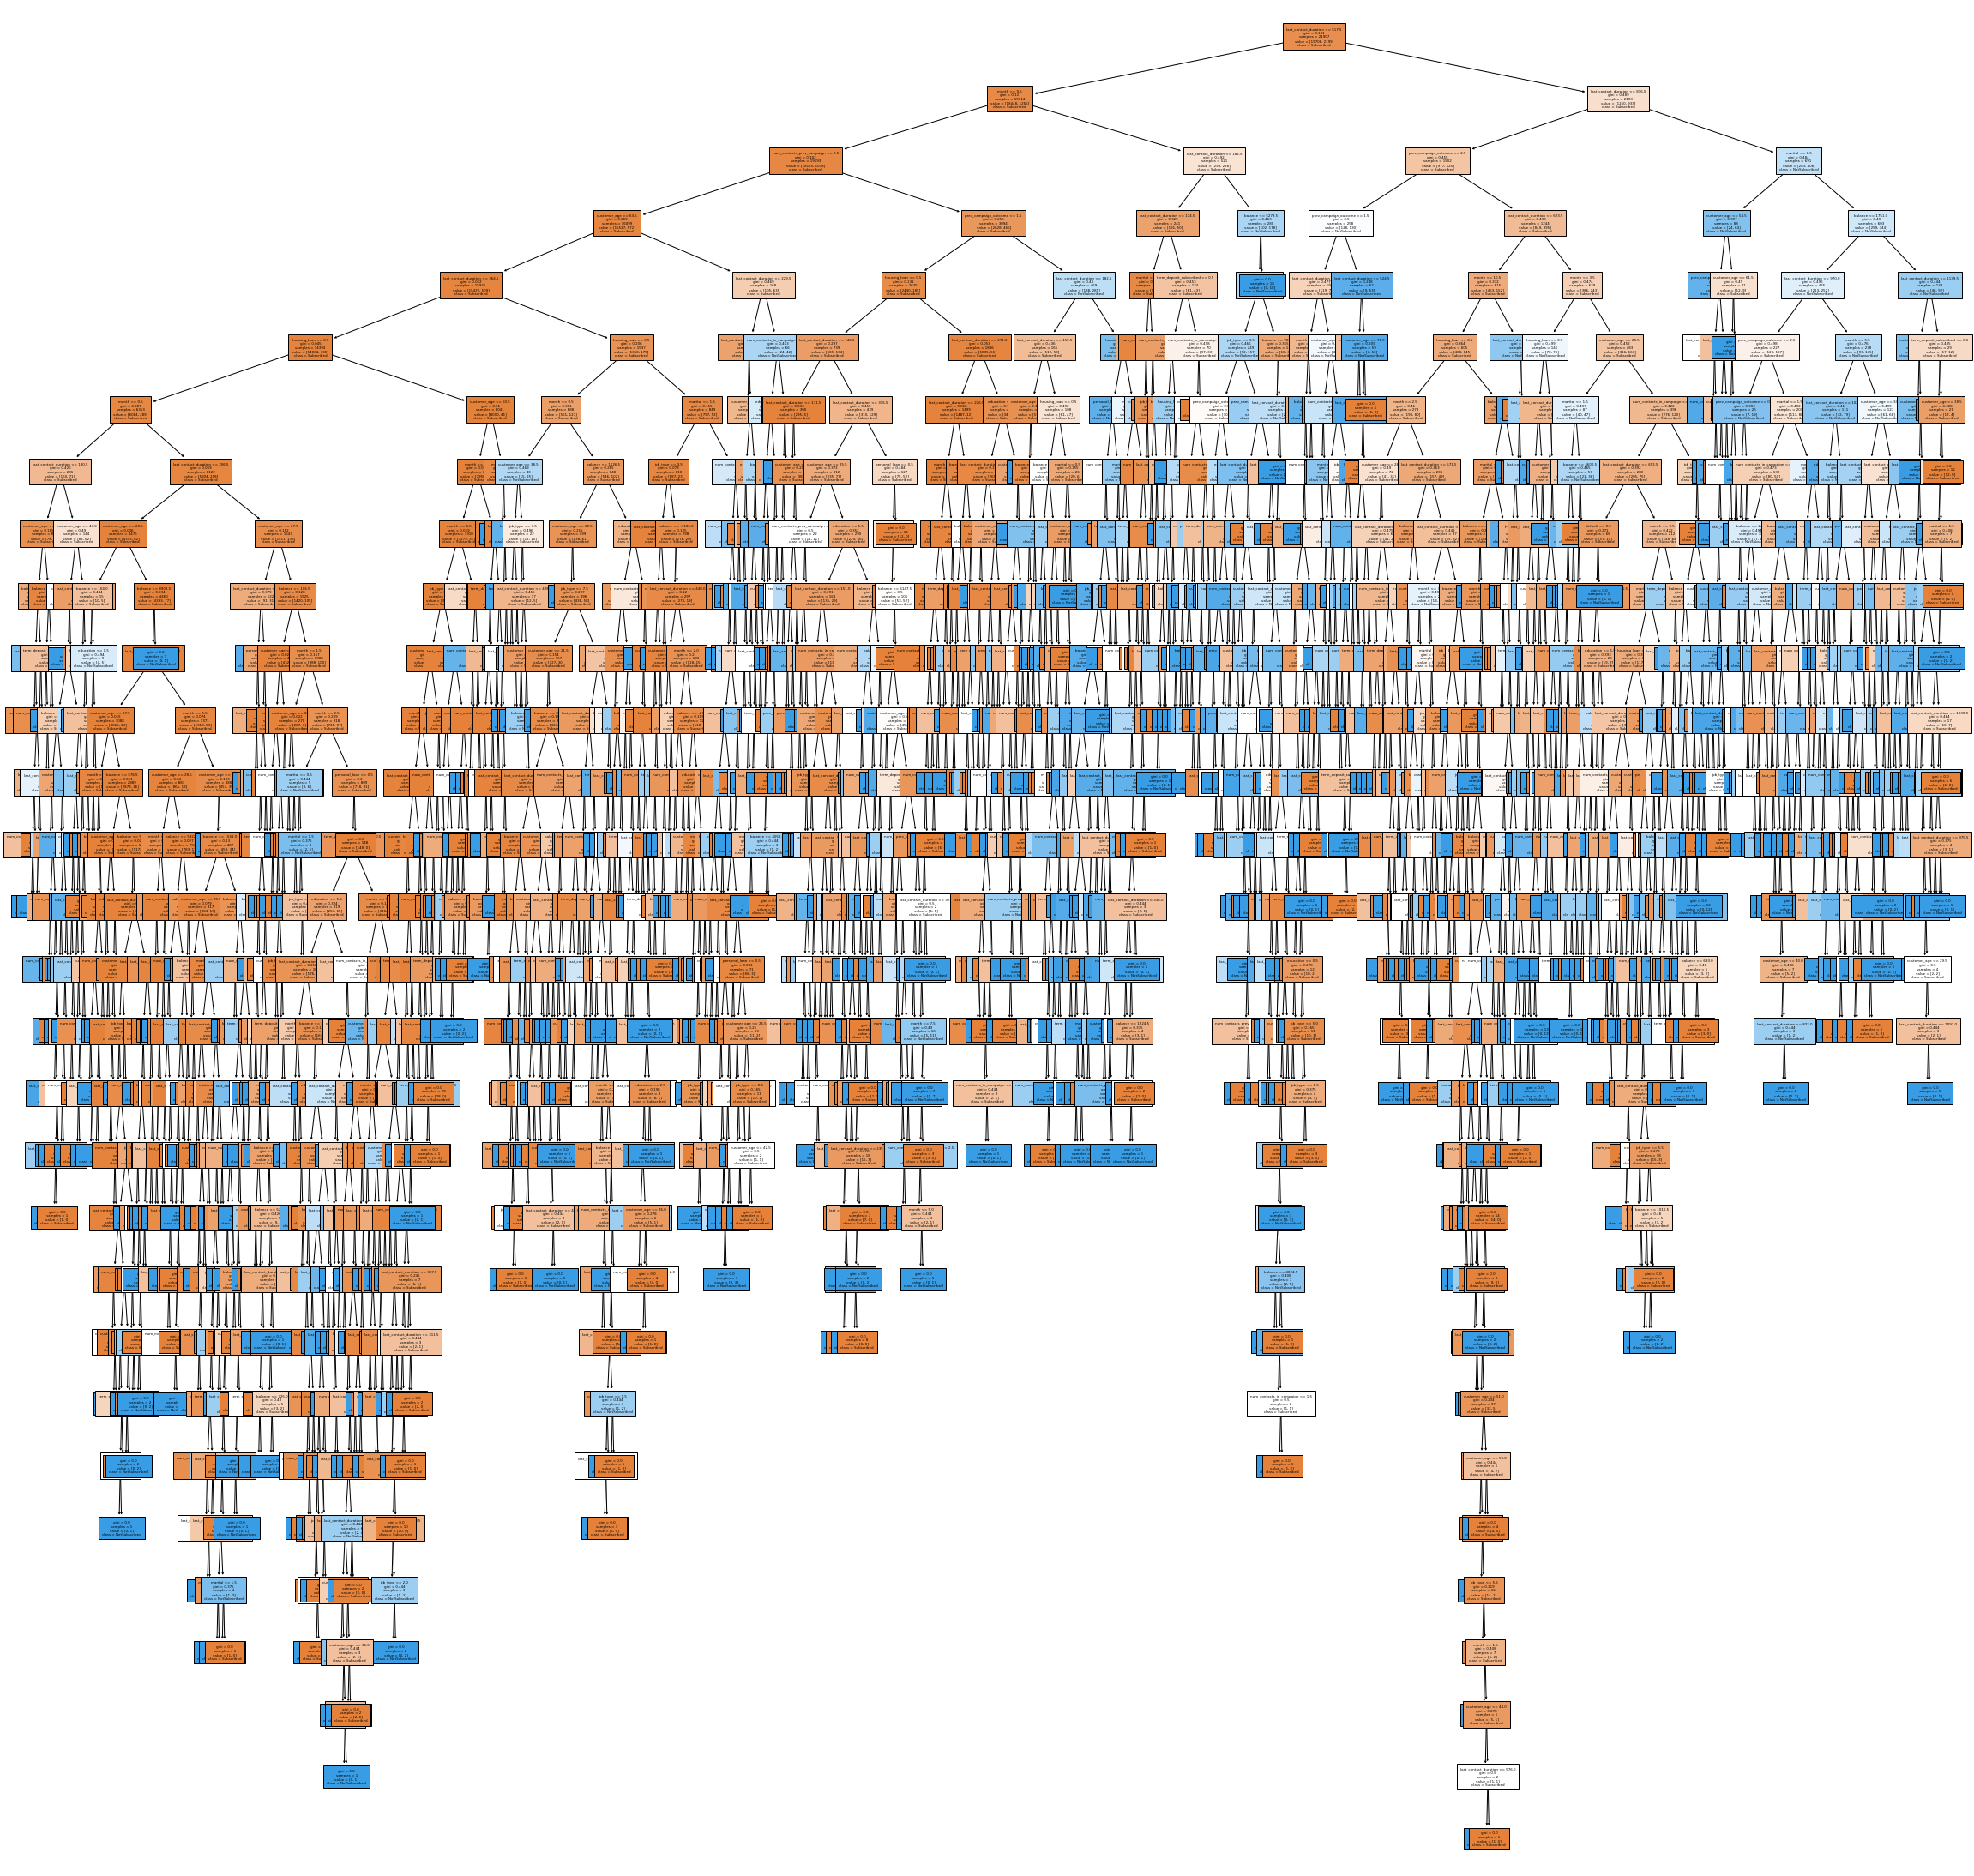

In [23]:
from sklearn import tree
from matplotlib import pyplot as plt

feature_names = train_data.columns
fig = plt.figure(figsize=(40,40))
_ = tree.plot_tree(clf,feature_names=feature_names,class_names={0:'Subscribed',1:'NotSubscribed'},filled=True,fontsize=4)

In [25]:
feature_names = input_names
feature_names

['customer_age',
 'job_type',
 'marital',
 'education',
 'default',
 'balance',
 'housing_loan',
 'personal_loan',
 'month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'num_contacts_prev_campaign',
 'prev_campaign_outcome',
 'mid_month']

In [27]:
clf.feature_importances_

array([0.12579196, 0.04862251, 0.01999316, 0.02856685, 0.00230992,
       0.13827557, 0.02198196, 0.00830146, 0.11686542, 0.32438973,
       0.03859868, 0.02963697, 0.07334309, 0.02332271])

In [28]:
feature_importance = pd.DataFrame(clf.feature_importances_, index =feature_names).sort_values(0, ascending=False)
feature_importance

,0
last_contact_duration,0.324390
balance,0.138276
customer_age,0.125792
month,0.116865
prev_campaign_outcome,0.073343
job_type,0.048623
num_contacts_in_campaign,0.038599
num_contacts_prev_campaign,0.029637
education,0.028567
mid_month,0.023323
